<a href="https://colab.research.google.com/github/Jangbugyeong/Machine-Learning/blob/main/9.11~18.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **생능 출판사 "으뜸 데이터 분석과 머신러닝"(개정판) 교재의 소스 코드**
## *9장 분류와 군집화*
---
* 출판사 : 생능 출판사( http://www.booksr.co.kr/ )
* 저자 : 박동규, 강영민, 김병욱
* 책의 소스코드 저장소 : https://github.com/dongupak/DataML
* 안내 : 이 노트북은 책의 코드를 담고 있습니다.
* 저작권 : 본 주피터 노트북 코드는 자유롭게 배포가능하지만 위의 출판사, 저서, 저자표기와 함께 배포해 주십시오.


### 9.11 게임을 하는 고객의 군집을 만들어보자

### 9.12 데이터 전처리의 필요성

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data_loc = 'https://github.com/dongupak/DataML/raw/main/csv/'
game_usage = pd.read_csv(data_loc + 'game_usage.csv')
game_usage.head(3)

,time spent,game level
0,39,944
1,55,705
2,29,757


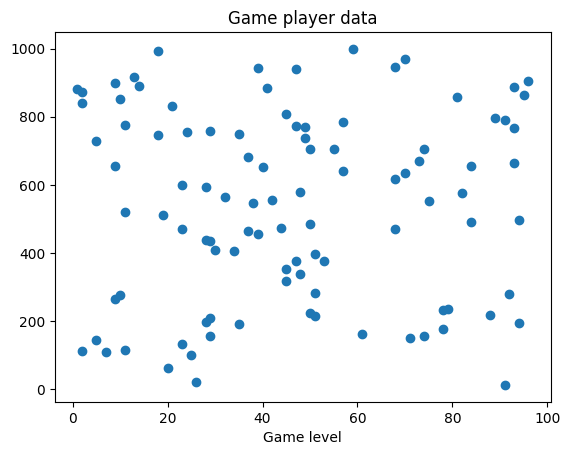

In [ ]:
X = game_usage['time spent']
Y = game_usage['game level']

# 으뜸 게임사의 게임 이용자 분석: 산포도 그래프
plt.title("Game player data")
plt.xlabel('Time spent')
plt.xlabel('Game level')
plt.scatter(X, Y)

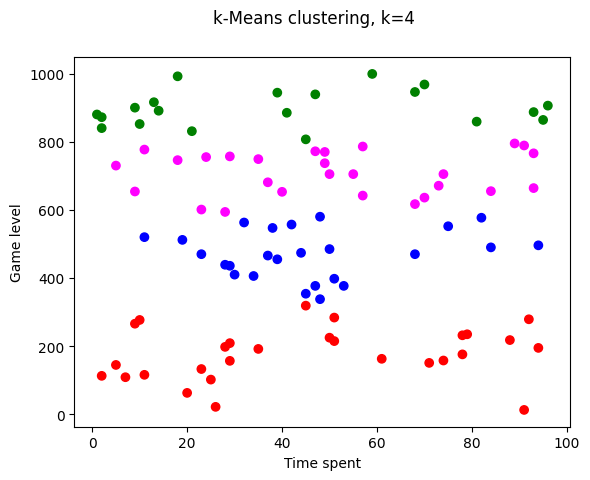

In [ ]:
from sklearn import cluster

def kmeans_predict_plot(data, k):
   model = cluster.KMeans(n_clusters=k, n_init=10)
   model.fit(data)
   labels = model.predict(data)
   colors = np.array(['red', 'green', 'blue', 'magenta'])
   plt.suptitle('k-Means clustering, k={}'.format(k))
   plt.xlabel('Time spent'), plt.ylabel('Game level')
   plt.scatter(data[:, 0], data[:, 1], color=colors[labels])

gamer_data = np.column_stack((X, Y))
kmeans_predict_plot(gamer_data, k = 4)

(0.0, 1000.0)

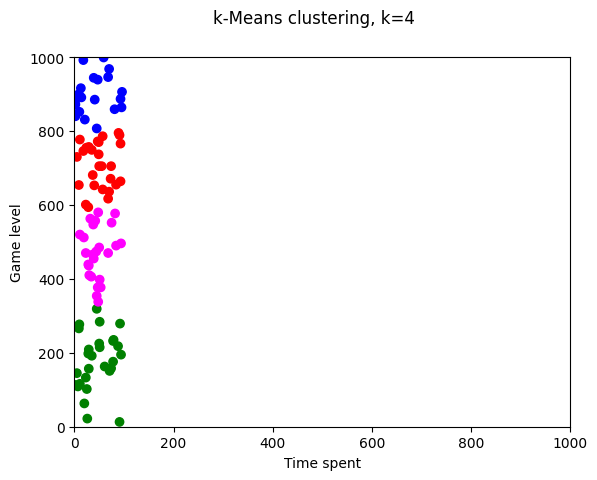

In [ ]:
kmeans_predict_plot(gamer_data, k = 4)
plt.xlim(0, 1000); plt.ylim(0, 1000)

#### 참고할 코드

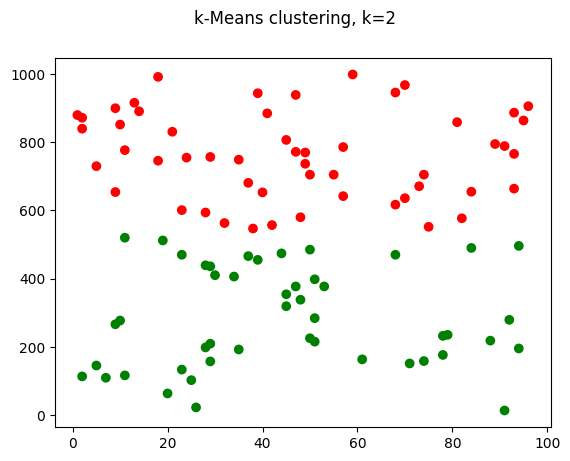

In [ ]:
# k = 2일때의 결과
from sklearn import cluster

gamer_data = np.column_stack((X, Y))

def kmeans_predict_plot(X, k):
    model = cluster.KMeans(n_clusters=k, n_init=10)
    model.fit(X)
    labels = model.predict(X)
    colors = np.array(['red', 'green', 'blue', 'magenta'])
    plt.suptitle('k-Means clustering, k={}'.format(k))
    plt.scatter(X[:, 0], X[:, 1], color=colors[labels])

kmeans_predict_plot(gamer_data, k = 2)

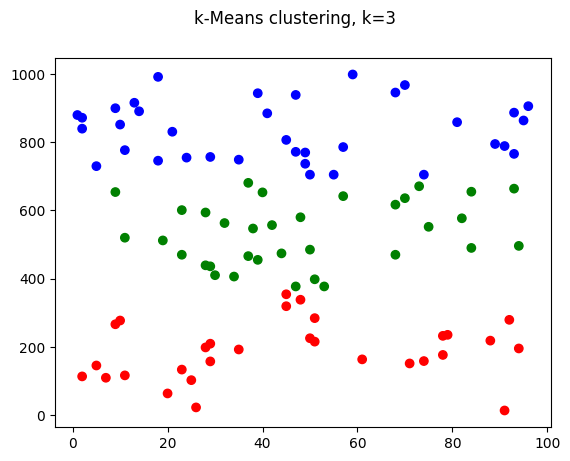

In [ ]:
 kmeans_predict_plot(gamer_data, k = 3) # 3개의 군집 생성

### 9.13 데이터 정규화 방법을 이용하자

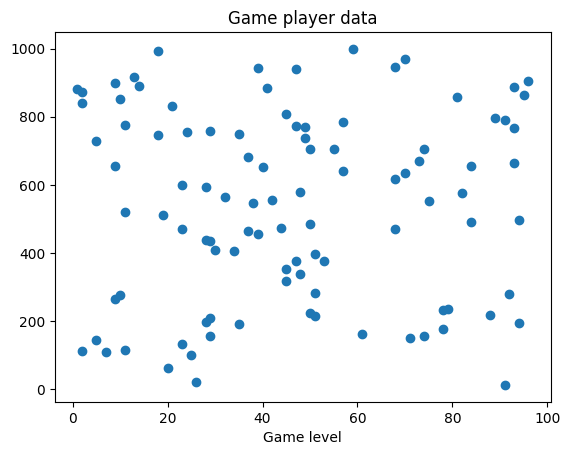

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data_loc = 'https://github.com/dongupak/DataML/raw/main/csv/'
game_usage = pd.read_csv(data_loc + 'game_usage.csv')
X = game_usage['time spent']
Y = game_usage['game level']

# 으뜸 게임사의 게임 이용자 분석: 산포도 그래프
plt.title("Game player data")
plt.xlabel('Time spent')
plt.xlabel('Game level')
plt.scatter(X, Y)

In [ ]:
# 최대, 최소값 스케일러
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(gamer_data)
n_data = scaler.transform(gamer_data)
n_data[:, 0].mean(), n_data[:, 1].mean()

(np.float64(0.4731578947368421), np.float64(0.5324949290060852))

In [ ]:
n_data[:, 0].min(), n_data[:, 0].max()

(np.float64(0.0), np.float64(1.0))

In [ ]:
n_data[:, 1].min(), n_data[:, 1].max()

(np.float64(0.0), np.float64(1.0))

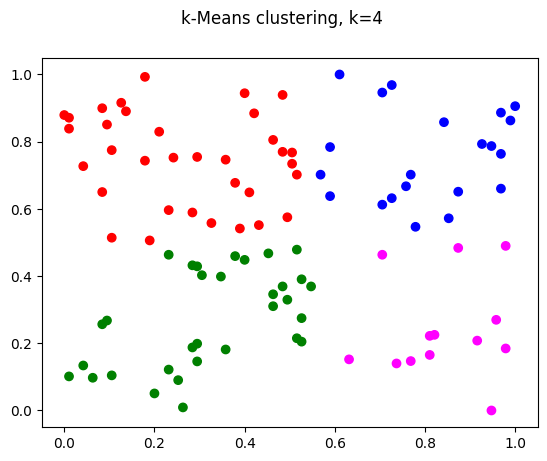

In [ ]:
kmeans_predict_plot(n_data, k = 4) # 4개의 군집 생성

### 9.14 다양한 스케일러 살펴보기

In [ ]:
import numpy as np

a = np.array([10, 8, 10, 8, 8, 4])
print('합계 :', a.sum())
print('평균 :', a.mean())
print('분산 :', a.var())
print('표준편차 :', a.std())

합계 : 48
평균 : 8.0
분산 : 4.0
표준편차 : 2.0


In [ ]:
from sklearn.preprocessing import StandardScaler

standardScaler = StandardScaler()
standardScaler.fit(gamer_data)
gamer_data_scaled = standardScaler.transform(gamer_data)

gamer_data_scaled[:, 0].std(), gamer_data_scaled[:, 1].std()

(np.float64(1.0000000000000002), np.float64(1.0))

In [ ]:
gamer_data_scaled[:, 0].mean(), gamer_data_scaled[:, 1].mean()

(np.float64(-1.1435297153639113e-16), np.float64(1.1546319456101628e-16))

### 9.15 스케일러 사용시의 주의 사항

## 9.16 스케일러 사용 실전 사례 : 유방암 데이터셋

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer

# 유방암 데이터세트 읽어오기
cancer=load_breast_cancer()
X_train,X_test,y_train,y_test = train_test_split(cancer.data,\
                                             cancer.target,random_state=0)
# 학습 데이터 및 테스트 데이터 shape 출력
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
score = knn.score(X_test, y_test)
print(f"스케일러 사용하지 않은 k-NN 정확도: {score:.2f}")

(426, 30) (143, 30) (426,) (143,)
스케일러 사용하지 않은 k-NN 정확도: 0.92


In [ ]:
# 최대, 최소값 스케일러
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
knn.fit(X_train_scaled, y_train) # 조정된 데이터로 kNN 학습

# 스케일 조정된 테스트 세트의 정확도
score = knn.score(X_test_scaled, y_test)
print(f"최대,최소값 스케일러 사용 후 k-NN 정확도: {score:.2f}")

최대,최소값 스케일러 사용 후 k-NN 정확도: 0.95


In [ ]:
# 표준 스케일러를 적용하자
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
knn.fit(X_train_scaled, y_train) # 조정된 데이터로 kNN 학습

# 스케일 조정된 테스트 세트의 정확도
score = knn.score(X_test_scaled, y_test)
print(f"표준 스케일러 사용 후 k-NN 정확도: {score:.2f}")

표준 스케일러 사용 후 k-NN 정확도: 0.94


### 9.17 붓꽃 데이터 집합을 k-평균 군집화 기법으로 분류하자

In [ ]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

iris = load_iris()

all_features = ['sepal length', 'sepal width', 'petal length',\
                'petal width']
iris_df = pd.DataFrame(iris.data, columns=all_features)
iris_df.head()

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
# 꽃잎의 길이(petal length)와 너비(petal width) 특성만을 사용
feature_names = ['petal length', 'petal width']
feature = iris_df[feature_names]
feature.head(3)

,petal length,petal width
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2


In [ ]:
km_model = KMeans(n_clusters=3, n_init=10)
km_model.fit(feature)

print(km_model.labels_)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 1 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 2 1 1 1 1
 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1
 1 1]


In [ ]:
print('세 군집의 중심 좌표')
print('첫 번째 군집:', km_model.cluster_centers_[0])
print('두 번째 군집:', km_model.cluster_centers_[1])
print('세 번째 군집:', km_model.cluster_centers_[2])

세 군집의 중심 좌표
첫 번째 군집: [1.462 0.246]
두 번째 군집: [5.59583333 2.0375    ]
세 번째 군집: [4.26923077 1.34230769]


### 9.18 붓꽃 데이터 집합의 군집 중심을 알아보자

In [ ]:
features = ['petal length', 'petal width']
# iris_data에서 세 번째, 네 번째 열을 추출함
iris_df = pd.DataFrame(iris.data[:, [2, 3]], columns=features)
iris_df['target'] = pd.Series(iris.target)
print('종에 따라 달라지는 꽃잎 길이와 너비의 평균값')
print(iris_df.groupby('target').mean())

종에 따라 달라지는 꽃잎 길이와 너비의 평균값
        petal length  petal width
target                           
0              1.462        0.246
1              4.260        1.326
2              5.552        2.026


In [ ]:
feature_names = ['petal length', 'petal width']
feature = iris_df[feature_names]

km_model = KMeans(n_clusters=3, n_init=10)
km_model.fit(feature)

pred = km_model.predict(feature)
predict = pd.DataFrame(pred, columns=['cluster'])
print(predict.head())

   cluster
0        1
1        1
2        1
3        1
4        1


In [ ]:
df = pd.concat([feature, predict], axis = 1)
print(df.head())

   petal length  petal width  cluster
0           1.4          0.2        1
1           1.4          0.2        1
2           1.3          0.2        1
3           1.5          0.2        1
4           1.4          0.2        1


In [ ]:
centers = pd.DataFrame(km_model.cluster_centers_,\
                      columns=feature_names)
print(centers.head())

   petal length  petal width
0      5.595833     2.037500
1      1.462000     0.246000
2      4.269231     1.342308


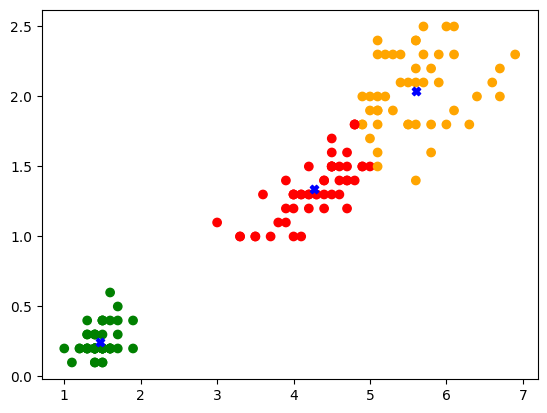

In [ ]:
import matplotlib.colors as mcolors

center_x = centers['petal length']  # 클러스터의 중심 x
center_y = centers['petal width']   # 클러스터의 중심 x
colors = ['orange', 'green', 'red'] # 클러스터의 색상

plt.scatter(df['petal length'], df['petal width'],
           c=df['cluster'], cmap = mcolors.ListedColormap(colors))
plt.scatter(center_x, center_y, marker='X', c='b')